In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [2]:
# Import data
gcamp_muts = pd.read_csv('./GCaMP6_lib.csv', index_col = 0)[1:]

# Get sequence for alignments

gcamp3_seq = 'MGSHHHHHHGMASMTGGQQMGRDLYDDDDKDLATMVDSSRRKWNKTGHAVRAIGRLSSLENVYIKADKQKNGIKANFKIRHNIEDGGVQLAYHYQQNTPIGDGPVLLPDNHYLSVQSKLSKDPNEKRDHMVLLEFVTAAGITLGMDELYKGGTGGSMVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLTYGVQCFSRYPDHMKQHDFFKSAMPEGYIQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNTRDQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTEAELQDMINEVDADGDGTIDFPEFLTMMARKMKDTDSEEEIREAFRVFDKDGNGYISAAELRHVMTNLGEKLTDEEVDEMIREADIDGDGQVNYEEFVQMMTAK*'
# Numbering here is correct, so index = seq_number - 1

AA1idx = [
    'A',
    'V',
    'L',
    'I',
    'M',
    'F',
    'Y',
    'W',
    'S',
    'T',
    'N',
    'Q',
    'C',
    'D',
    'E',
    'H',
    'K',
    'R',
    'G',
    'P',
    '*'
]

AA3idx = [
    'Ala',
    'Val',
    'Leu',
    'Ile',
    'Met',
    'Phe',
    'Tyr',
    'Trp',
    'Ser',
    'Thr',
    'Asn',
    'Gln',
    'Cys',
    'Asp',
    'Glu',
    'His',
    'Lys',
    'Arg',
    'Gly',
    'Pro',
    'Stop'
]


In [3]:
# Build matrix for a single sample
varArrDF = pd.DataFrame(index = gcamp_muts.index.tolist(), columns = range(1350))

for variant in gcamp_muts.index.tolist()[1:]:
    # Parse out mutations for this variant
    mutations = gcamp_muts.loc[variant, 'Mutations added to GCaMP3'].split(' ')
    varSeq = list(gcamp3_seq)
    
    # Mutate sequence accordingly
    for mutation in mutations:
        seqn = int(mutation[1:-1])
        varSeq[seqn - 1] = mutation[-1]
    
    # Make a DF with Z-scales according to each residue, and flatten into a 1D array
    varDF = pd.DataFrame(index = range(len(varSeq)), columns = ['Seq', 'Z1', 'Z2', 'Z3'])
    varDF['Seq'] = varSeq
    varDF = varDF[:-1]
    for pos in varDF.index:
        resID = varDF.loc[pos, 'Seq']
        varDF.loc[pos, ['Z1', 'Z2', 'Z3']] = z_scales.loc[resID]
    varArr = varDF[['Z1', 'Z2', 'Z3']].values.flatten()
    
    # Assign variant array to master DF
    varArrDF.loc[variant] = varArr

NameError: name 'z_scales' is not defined

In [ ]:
# Add GCaMP3 values to master
varSeq = list(gcamp3_seq)
varDF = pd.DataFrame(index = range(len(varSeq)), columns = ['Seq', 'Z1', 'Z2', 'Z3'])
varDF['Seq'] = varSeq
varDF = varDF[:-1]
for pos in varDF.index:
    resID = varDF.loc[pos, 'Seq']
    varDF.loc[pos, ['Z1', 'Z2', 'Z3']] = z_scales.loc[resID]
varArr = varDF[['Z1', 'Z2', 'Z3']].values.flatten()
varArrDF.loc['GCaMP3'] = varArr
#varArrDF.to_csv('./varZScore3.csv')

In [238]:
# Drop positions that do not mutate
varArrDF = pd.read_csv('./varZScore3.csv', index_col = 0)
colsToDrop = varArrDF.nunique()[varArrDF.nunique() == 1].index
dat = varArrDF.drop(colsToDrop, axis = 1)
dat

,174,175,176,177,178,179,180,181,182,186,...,1217,1299,1300,1301,1302,1303,1304,1314,1315,1316
GCaMP3,-4.19,-1.03,-0.98,3.08,0.39,-0.07,3.22,1.45,0.84,-1.39,...,-0.07,2.23,-5.36,0.3,3.64,1.13,2.36,3.22,1.45,0.84
GCaMP5G,-4.19,-1.03,-0.98,3.08,0.39,-0.07,3.22,1.45,0.84,-1.39,...,-0.07,2.23,-5.36,0.3,3.64,1.13,2.36,3.22,1.45,0.84
GCaMP6s,-4.19,-1.03,-0.98,3.08,0.39,-0.07,3.22,1.45,0.84,-1.39,...,-0.07,2.23,-5.36,0.3,3.64,1.13,2.36,3.22,1.45,0.84
GCaMP6m,-4.19,-1.03,-0.98,3.08,0.39,-0.07,3.22,1.45,0.84,-1.39,...,-0.07,2.23,-5.36,0.3,3.64,1.13,2.36,3.22,1.45,0.84
GCaMP6f,-4.19,-1.03,-0.98,3.08,0.39,-0.07,3.22,1.45,0.84,-1.39,...,-0.07,2.23,-5.36,0.3,3.64,1.13,2.36,3.22,1.45,0.84
3,-4.19,-1.03,-0.98,3.08,0.39,-0.07,3.22,1.45,0.84,-1.39,...,-0.07,2.23,-5.36,0.3,3.64,1.13,2.36,3.22,1.45,0.84
29,-4.19,-1.03,-0.98,3.08,0.39,-0.07,3.22,1.45,0.84,-1.39,...,-0.07,2.23,-5.36,0.3,3.64,1.13,2.36,3.22,1.45,0.84
30,-4.19,-1.03,-0.98,3.08,0.39,-0.07,3.22,1.45,0.84,-1.39,...,-0.07,2.23,-5.36,0.3,3.64,1.13,2.36,3.22,1.45,0.84
31,2.41,1.74,1.11,-1.22,0.88,2.23,3.22,1.45,0.84,-1.39,...,-0.07,2.23,-5.36,0.3,3.64,1.13,2.36,3.22,1.45,0.84
54,-4.19,-1.03,-0.98,3.08,0.39,-0.07,3.22,1.45,0.84,-1.39,...,-0.07,2.23,-5.36,0.3,3.64,1.13,2.36,3.22,1.45,0.84


In [239]:
# Make copies of original DFs to use for training
datCopy = dat.copy()
gcamp_mutsCopy = gcamp_muts.copy()

datCopy.drop('54', inplace = True)
gcamp_mutsCopy.drop('54', inplace = True)

In [240]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
x = datCopy
y = gcamp_mutsCopy['160 AP !F/F0']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [209]:
# Scaling
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

/Users/nguyenva/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/nguyenva/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/Users/nguyenva/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  """


In [241]:
# Build SGD Regression mode
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(max_iter = np.ceil(10**6 / len(y_train)))

# Train SGDRegressor
reg.fit(x_train, y_train)

# Predict values
y_pred = reg.predict(x_test)

In [244]:
# Bulid linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [246]:
reg.score(x_test, y_test)

-2.468202423157684e+16

Text(0,0.5,'Predicted 160 AP dF/F0')

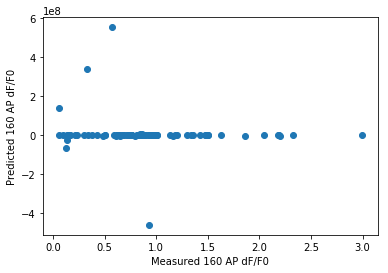

In [245]:
plt.scatter(y_test, y_pred)
plt.xlabel('Measured 160 AP dF/F0')
plt.ylabel('Predicted 160 AP dF/F0')

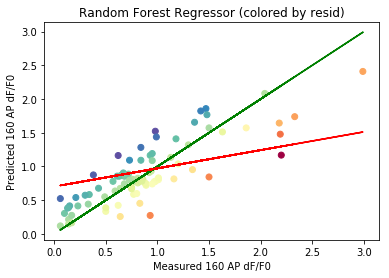

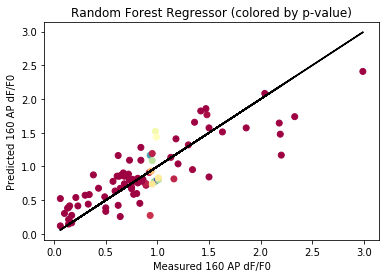

In [294]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Gaussian Classifier
clf = RandomForestRegressor(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)
resid = y_pred - y_test
plt.scatter(y_test, y_pred, c = resid, cmap = 'Spectral')
plt.plot(y_test, y_test, 'g')

b, m = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, b + m * y_test, 'r')

plt.xlabel('Measured 160 AP dF/F0')
plt.ylabel('Predicted 160 AP dF/F0')
plt.title('Random Forest Regressor (colored by resid)')
plt.show()

plt.scatter(y_test, y_pred, c = gcamp_muts.loc[y_test.index, '160 AP p-value'], cmap = 'Spectral')
plt.plot(y_test, y_test, 'k')
plt.xlabel('Measured 160 AP dF/F0')
plt.ylabel('Predicted 160 AP dF/F0')
plt.title('Random Forest Regressor (colored by p-value)')
plt.show()


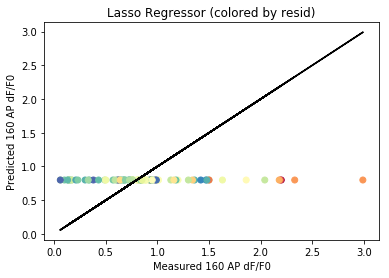

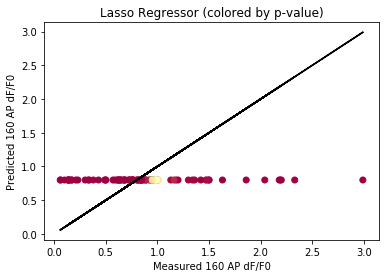

In [273]:
# Lasso model
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
resid = y_pred - y_test
plt.scatter(y_test, y_pred, c = resid, cmap = 'Spectral')
plt.plot(y_test, y_test, 'k')
plt.xlabel('Measured 160 AP dF/F0')
plt.ylabel('Predicted 160 AP dF/F0')
plt.title('Lasso Regressor (colored by resid)')
plt.show()

plt.scatter(y_test, y_pred, c = gcamp_muts.loc[y_test.index, '160 AP p-value'], cmap = 'Spectral')
plt.plot(y_test, y_test, 'k')
plt.xlabel('Measured 160 AP dF/F0')
plt.ylabel('Predicted 160 AP dF/F0')
plt.title('Lasso Regressor (colored by p-value)')
plt.show()

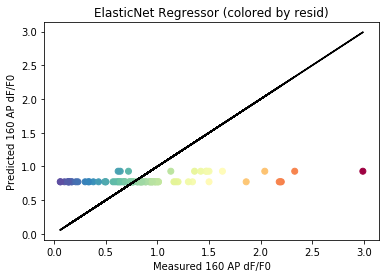

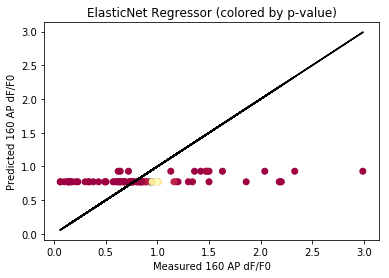

In [274]:
from sklearn.linear_model import ElasticNet
elasticNet = ElasticNet()
elasticNet.fit(x_train, y_train)
y_pred = elasticNet.predict(x_test)
resid = y_pred - y_test

plt.scatter(y_test, y_pred, c = resid, cmap = 'Spectral')
plt.plot(y_test, y_test, 'k')
plt.xlabel('Measured 160 AP dF/F0')
plt.ylabel('Predicted 160 AP dF/F0')
plt.title('ElasticNet Regressor (colored by resid)')
plt.show()

plt.scatter(y_test, y_pred, c = gcamp_muts.loc[y_test.index, '160 AP p-value'], cmap = 'Spectral')
plt.plot(y_test, y_test, 'k')
plt.xlabel('Measured 160 AP dF/F0')
plt.ylabel('Predicted 160 AP dF/F0')
plt.title('ElasticNet Regressor (colored by p-value)')
plt.show()

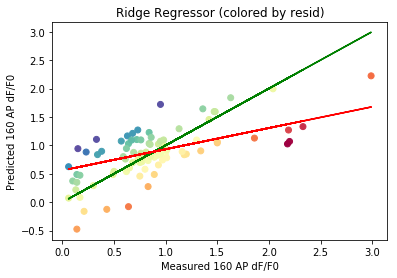

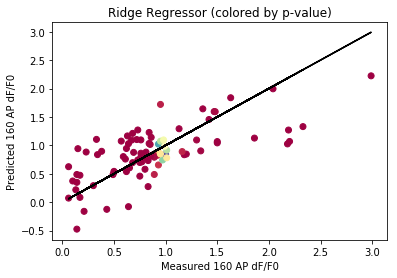

In [293]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
resid = y_pred - y_test

plt.scatter(y_test, y_pred, c = resid, cmap = 'Spectral')
plt.plot(y_test, y_test, 'g')

b, m = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, b + m * y_test, 'r')

plt.xlabel('Measured 160 AP dF/F0')
plt.ylabel('Predicted 160 AP dF/F0')
plt.title('Ridge Regressor (colored by resid)')
plt.show()

plt.scatter(y_test, y_pred, c = gcamp_muts.loc[y_test.index, '160 AP p-value'], cmap = 'Spectral')
plt.plot(y_test, y_test, 'k')
plt.xlabel('Measured 160 AP dF/F0')
plt.ylabel('Predicted 160 AP dF/F0')
plt.title('Ridge Regressor (colored by p-value)')
plt.show()

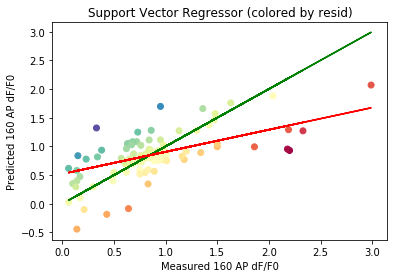

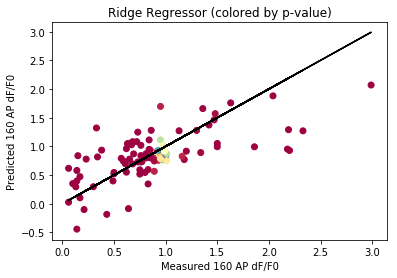

In [292]:
svr = sklearn.svm.SVR(kernel = 'linear')
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)
resid = y_pred - y_test

plt.scatter(y_test, y_pred, c = resid, cmap = 'Spectral')
plt.plot(y_test, y_test, 'g')

b, m = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, b + m * y_test, 'r')


plt.xlabel('Measured 160 AP dF/F0')
plt.ylabel('Predicted 160 AP dF/F0')
plt.title('Support Vector Regressor (colored by resid)')
plt.show()

plt.scatter(y_test, y_pred, c = gcamp_muts.loc[y_test.index, '160 AP p-value'], cmap = 'Spectral')
plt.plot(y_test, y_test, 'k')
plt.xlabel('Measured 160 AP dF/F0')
plt.ylabel('Predicted 160 AP dF/F0')
plt.title('Ridge Regressor (colored by p-value)')
plt.show()

In [283]:
svr.score(x_test, y_test)

0.4288937308761601

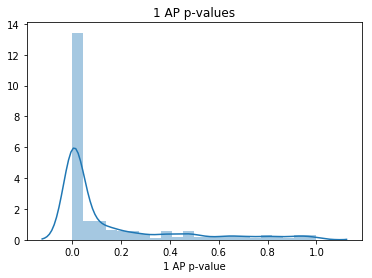

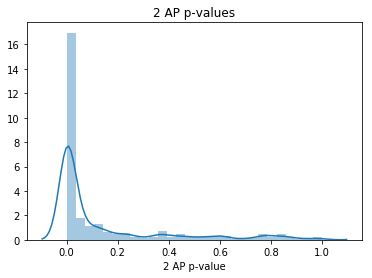

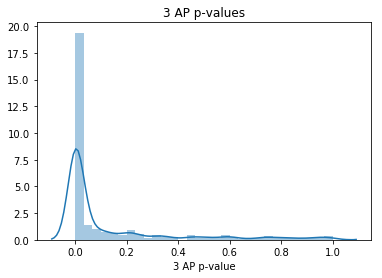

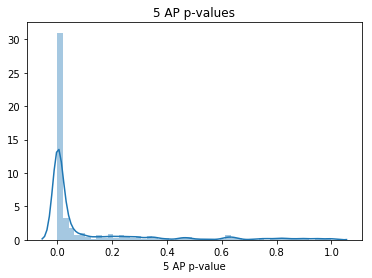

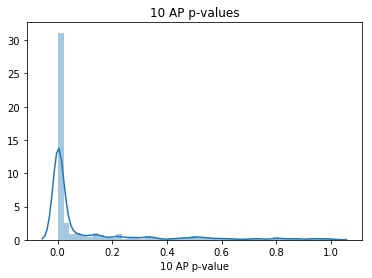

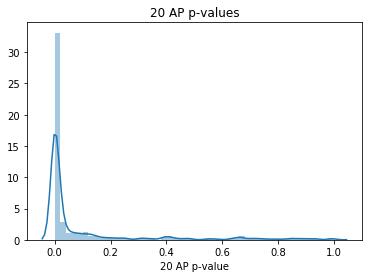

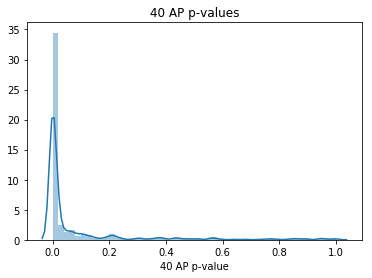

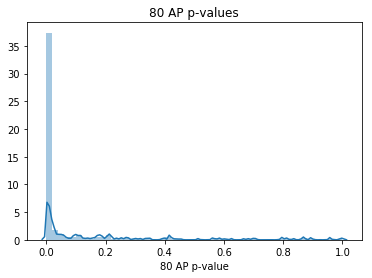

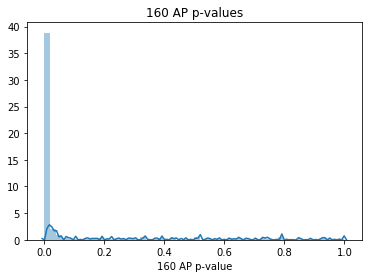

In [279]:
# Looking at p-values
sns.distplot(gcamp_muts['1 AP p-value'])
plt.title('1 AP p-values')
plt.show()

sns.distplot(gcamp_muts['2 AP p-value'])
plt.title('2 AP p-values')
plt.show()

sns.distplot(gcamp_muts['3 AP p-value'])
plt.title('3 AP p-values')
plt.show()

sns.distplot(gcamp_muts['5 AP p-value'])
plt.title('5 AP p-values')
plt.show()

sns.distplot(gcamp_muts['10 AP p-value'])
plt.title('10 AP p-values')
plt.show()

sns.distplot(gcamp_muts['20 AP p-value'])
plt.title('20 AP p-values')
plt.show()

sns.distplot(gcamp_muts['40 AP p-value'])
plt.title('40 AP p-values')
plt.show()

sns.distplot(gcamp_muts['80 AP p-value'])
plt.title('80 AP p-values')
plt.show()

sns.distplot(gcamp_muts['160 AP p-value'])
plt.title('160 AP p-values')
plt.show()

In [300]:
# Cross validating ridge regressors, SVR, and random forests
from sklearn.model_selection import cross_val_score
ridge = Ridge()
scores = cross_val_score(ridge, x, y, cv = 10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

svr = sklearn.svm.SVR(kernel = 'linear')
scores = cross_val_score(svr, x, y, cv = 10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

rfr = sklearn.ensemble.RandomForestRegressor(n_estimators = 100)
scores = cross_val_score(rfr, x, y, cv = 10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.12253858 -0.22921409 -1.08868502 -1.25198943  0.29047858 -1.12263997
 -0.2241209  -3.30238901  0.37499313  0.41269992]
Accuracy: -0.60 (+/- 2.17)
[ 0.04165799 -0.0723674  -1.59548464 -1.13336254  0.13914409 -1.07347713
 -0.74994275 -2.95614847  0.35402797  0.25632979]
Accuracy: -0.68 (+/- 1.99)
[ 0.48095585 -0.54624436 -1.27491441 -1.68639497  0.20291478 -1.46284723
  0.19251948 -6.04007191 -0.23948827  0.72870361]
Accuracy: -0.96 (+/- 3.74)


In [299]:
# Sanity check for using the score metric (lasso, elasticnet, linear, sgd)
scores = cross_val_score(linreg, x, y, cv = 10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(reg, x, y, cv = 10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(elasticNet, x, y, cv = 10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(lasso, x, y, cv = 10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[-8.80639437e+23 -1.43919902e+26 -1.96073727e+24 -1.10381002e+25
 -4.38104786e+24 -1.05764463e+26 -1.65031032e+27 -7.32789366e+25
 -7.15908410e+26 -6.00656449e+25]
Accuracy: -276750820350958167467753472.00 (+/- 1002229762768082983561723904.00)
[-3.42381848e+14 -8.62558604e+14 -3.69559430e+17 -1.10976464e+15
 -3.75859446e+11 -4.08322021e+15 -1.09612803e+17 -4.44130132e+13
 -2.54237181e+14 -1.22215793e+14]
Accuracy: -48599139999041040.00 (+/- 223597157182982784.00)
[-0.1670971  -0.12512718 -0.4848085  -0.8891426  -0.06542839 -0.56270577
  0.08139371 -0.26312096 -0.11525074 -0.90997673]
Accuracy: -0.35 (+/- 0.66)
[-0.23324663 -0.20826537 -0.62313322 -1.09661626 -0.14960206 -0.76633381
 -0.04919759 -0.35983761 -0.30786194 -0.90997673]
Accuracy: -0.47 (+/- 0.68)


In [329]:
# Choose different CV method (ridge regressor, SVR, random forest)
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits = 100, test_size = 0.2)
ss.get_n_splits(x)


ridgeScores = []
svrScores = []
rfScores = []
adaScores = []

for train_index, test_index in ss.split(x):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    mdl = Ridge()
    mdl.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)
    ridgeScores.append(mdl.score(x_test, y_test))
    
for train_index, test_index in ss.split(x):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    mdl = sklearn.svm.SVR()
    mdl.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)
    svrScores.append(mdl.score(x_test, y_test))
    
    
for train_index, test_index in ss.split(x):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    mdl = RandomForestRegressor()
    mdl.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)
    rfScores.append(mdl.score(x_test, y_test))

for train_index, test_index in ss.split(x):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    mdl = sklearn.ensemble.AdaBoostRegressor()
    mdl.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)
    adaScores.append(mdl.score(x_test, y_test))

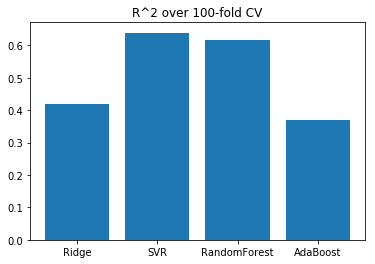

In [334]:
plt.bar([1, 2, 3, 4],[np.mean(ridgeScores), np.mean(svrScores), np.mean(rfScores), np.mean(adaScores)])
plt.xticks([1, 2, 3, 4], ['Ridge', 'SVR', 'RandomForest', 'AdaBoost'])
plt.title('R^2 over 100-fold CV')
plt.show()